# Properties of Fourier transforms

## Let's discuss
So far we considered sinusoidal signals. But we can of course Fourier transform whatever we like! 

We consider: A delta-peak, and a pulse, and a DC signal.

Text(0, 0.5, 'amplitude')

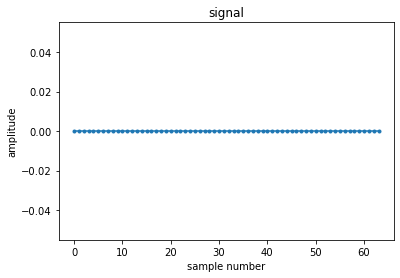

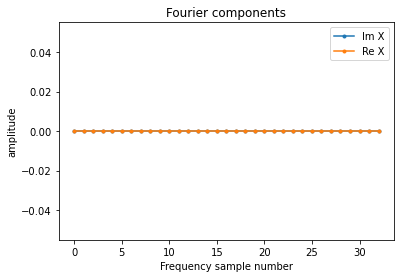

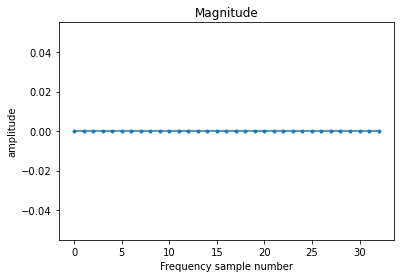

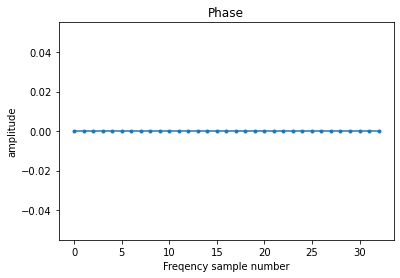

In [58]:
import numpy as np
import matplotlib.pyplot as plt

numberOfDatapoints = 64

signal = np.zeros(numberOfDatapoints)

#signal[5] = 1
#signal[20:25] = 1
#signal[:] = 1
#signal[len(signal)//2]=1
#signal[0:5]=1
#signal[-4:]=1

plt.plot(signal, '.-')
plt.title('signal'); plt.xlabel('sample number');plt.ylabel('amplitude')


ft = np.fft.rfft(signal)
plt.figure()
plt.plot(np.imag(ft),'.-',label=r'Im X')
plt.plot(np.real(ft),'.-',label=r'Re X')
plt.title('Fourier components');plt.xlabel('Frequency sample number');plt.ylabel('amplitude');plt.legend()

plt.figure()
plt.plot((np.imag(ft)**2+np.real(ft)**2)**(1/2),'.-')
plt.title('Magnitude');plt.xlabel('Frequency sample number');plt.ylabel('amplitude')

plt.figure()
plt.plot(np.arctan2(np.imag(ft),(0.00001+np.real(ft))),'.-')
plt.title('Phase'); plt.xlabel('Freqency sample number');plt.ylabel('amplitude')


# Why are fourier transforms so useful?

First another example


<img src="figs/20220519_-_RQO_-_Pulse_Timings_-_ODT_intensity_stabilisation_PD_into_just_PID_plot.png" width="400" />  <img src="figs/20220519_-_RQO_-_Pulse_Timings_-_ODT_intensity_stabilisation_PD_into_T_piece_into_high_Ohm_osci_plot.png" width="400" /> 

We send in some signal, which is supposed to be square - but electronics-components cannot react infinitely fast.

You can imagine that a delta-function coming through the system is smeared out over some time.

<img src="figs/sinle_photon_interferometer.jpg" width="400" /> 


To calculate this, we need a convolution of the input and the response. Consider this figure from *The Scientist and Engineer's Guide to
Digital Signal Processing* by Steven W. Smith.

<img src="figs/The scientist and engineers guide to digital signal processing - convolution.png" width="800" /> 

If we want to do a convolution of some input signal $f[x]$ with some response from an electric component $g[x]$ to give us a signal y[x], then the convolution in discrete space is
\begin{align}
    y[x] = \sum_{\chi=0}^{M-1} g[\chi] f[x-\chi]
\end{align}
where we assume that $f[x]$ is an N point signal between 0 and N and $g[x]$ runs between 0 and M. 

The resulting $y[x]$ has N+M-1 points (!)

Convolutions are computationally heavy. Luckily we can also go to frequency domain! 

# Properties:
* Linearity
\begin{align}
    \alpha f[x] + \beta g[x] \leftrightarrow \alpha \tilde{f}[\kappa] + \beta \tilde{g}[\kappa] 
\end{align}

* Convolutions
\begin{align}
    f[x] * g[x] \leftrightarrow \tilde{f}[\kappa] \tilde{g}'[\kappa] 
\end{align}



Instead of transforming the signal in time-domain, we can do it in frequency domain. On the other hand, multiplications in time-domain becomes convolutions in frequency-domains. This is not so nice!


Let's assume that we want to smoothen edges: Low-pass filter. 


Text(0.5, 0, 'Frequency sample')

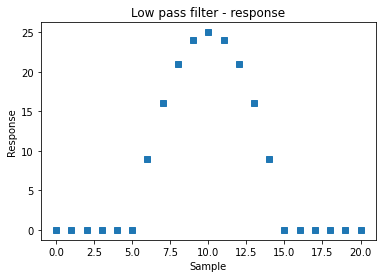

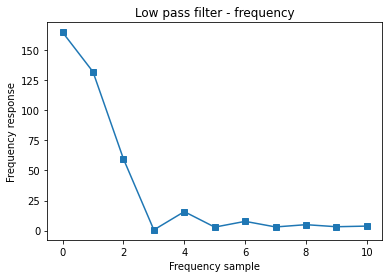

In [129]:
samples = np.linspace(-5,5,10+1)
g = -np.linspace(-5,5,10+1)**2+25
g = -np.linspace(-10,10,20+1)**2+25

g[g<0]=0
plt.plot(g,'s'); plt.title('Low pass filter - response');plt.ylabel('Response');plt.xlabel('Sample')

plt.figure()
plt.plot(np.abs(np.fft.rfft(g)),'s-');plt.title('Low pass filter - frequency');plt.ylabel('Frequency response');plt.xlabel('Frequency sample')

Now we assume that we again have some sharp-edged input signal:

Text(0, 0.5, 'signal')

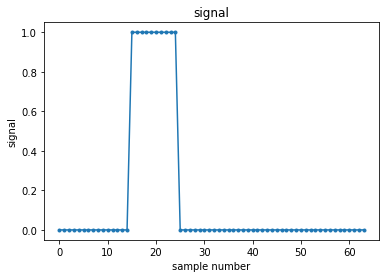

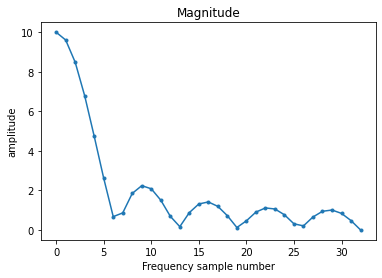

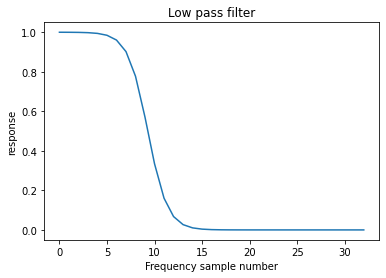

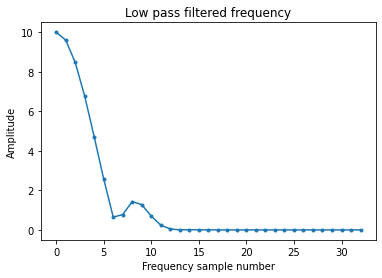

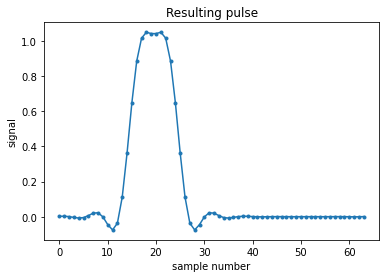

In [162]:
numberOfDatapoints = 64

signal = np.zeros(numberOfDatapoints)

signal[15:25] = 1
#signal[20:25] = 1
#signal[:] = 1
#signal[len(signal)//2]=1
#signal[0:5]=1
#signal[-4:]=1

plt.plot(signal, '.-')
plt.title('signal'); plt.xlabel('sample number');plt.ylabel('signal')



plt.figure()
plt.plot((np.imag(ft)**2+np.real(ft)**2)**(1/2),'.-')
plt.title('Magnitude');plt.xlabel('Frequency sample number');plt.ylabel('amplitude')

# Convolute! 
plt.figure()
# Poor girl's convolution, we just construct a filter. 
passpoint = 9
lowPass = 1-1/(1+np.exp(-np.linspace(1,numberOfDatapoints//2,numberOfDatapoints//2+1)+passpoint+1))
plt.plot(lowPass,'-')
plt.title('Low pass filter');plt.xlabel('Frequency sample number');plt.ylabel('response')

plt.figure()
plt.plot(np.abs(ft)*lowPass,'.-')
plt.title('Low pass filtered frequency');plt.xlabel('Frequency sample number');plt.ylabel('Amplitude')

plt.figure()
plt.plot(np.fft.irfft(ft*lowPass),'.-')
plt.title('Resulting pulse');plt.xlabel('sample number');plt.ylabel('signal')

Beware! 

Here we illustrate how filter-processes work.

There is a bit more to it, and more considerations to take into account in reality - but for most practical purposes, this is enough!

